Decision Tree for Naive Dataset

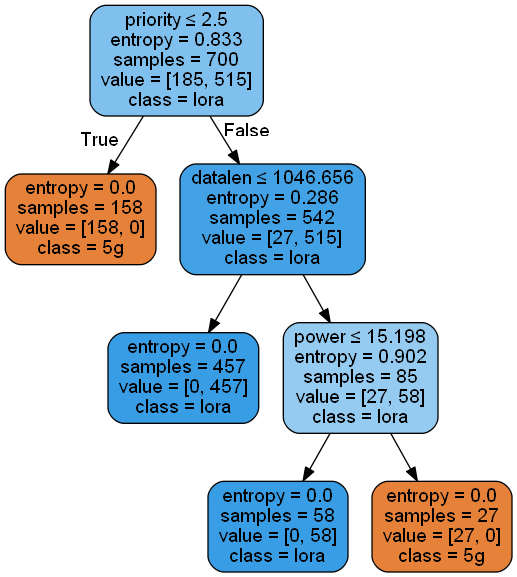

In [34]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import csv
import pydotplus
import numpy

file = open('output.csv', 'r', encoding='utf-8')
reader = csv.reader(file)

total = list(reader)
data = total[1:]
length = len(data)

label = total[1]

x, y = [],[]

i = 0
while i < length:
    x.append(data[i][1:4])
    y.append(data[i][4])
    
    i+=1

#print(x)
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
    
#Build Radio Access Technology (RAT) Tree
rat_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state=0)
rat_tree.fit(x_train, y_train)
dot_data = export_graphviz(rat_tree, out_file=None,\
                          feature_names=['priority', 'datalen', 'power'],\
                          class_names = ["5g", "lora"], filled=True, rounded=True,\
                          special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())